# EDA: Solana Price Analysis (2020-2025)

## Objetivo
Análisis exploratorio completo del dataset histórico de Solana para preparación de modelos predictivos.

### Fases:
1. **Carga y exploración** de datos  
2. **3 gráficas clave** para entender patrones  
3. **Feature engineering** para modelos  
4. **Export** de features preparados


## 1. Importar librerías


In [70]:
# activar entorno virtual
# .\venv\Scripts\Activate.ps1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')

# Configurar matplotlib
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

print("Librerías importadas correctamente")

Librerías importadas correctamente


## 2. Cargar Dataset


In [71]:
# Cargar CSV
df = pd.read_csv('../data/sol_1d_data_2020_to_2025.csv')

# Info básica
print(f"Shape: {df.shape}")
print(f"\nColumnas: {df.columns.tolist()}")
print("\nPrimeras 5 filas:")
df.head()


Shape: (1877, 12)

Columnas: ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore']

Primeras 5 filas:


,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,2020-08-11 00:00:00.000000,2.8500,3.5208,2.8433,3.2985,1552384.78,2020-08-11 23:59:59.999000,4.939149e+06,13490,741770.79,2.370193e+06,0
1,2020-08-12 00:00:00.000000,3.2985,3.9289,3.0800,3.7558,1737042.95,2020-08-12 23:59:59.999000,6.176154e+06,21118,889133.50,3.161944e+06,0
2,2020-08-13 00:00:00.000000,3.7500,4.1387,3.5003,3.7300,1685759.24,2020-08-13 23:59:59.999000,6.446568e+06,22922,716358.46,2.755765e+06,0
3,2020-08-14 00:00:00.000000,3.7207,3.7676,3.3210,3.4099,1474161.79,2020-08-14 23:59:59.999000,5.205834e+06,18581,578651.84,2.048897e+06,0
4,2020-08-15 00:00:00.000000,3.4181,3.7400,3.1500,3.1730,1070233.20,2020-08-15 23:59:59.999000,3.658006e+06,13903,439623.97,1.510473e+06,0


## 3. Limpieza y preparación inicial


In [72]:
# Convertir timestamp a datetime
df['Open time'] = pd.to_datetime(df['Open time'])
df.sort_values('Open time', inplace=True)
df.reset_index(drop=True, inplace=True)

# Verificar datos faltantes
print("Datos faltantes:")
print(df.isnull().sum())

print(f"\nRango temporal: {df['Open time'].min()} a {df['Open time'].max()}")
print(f"Total de registros: {len(df)}")


Datos faltantes:
Open time                       0
Open                            0
High                            0
Low                             0
Close                           0
Volume                          0
Close time                      0
Quote asset volume              0
Number of trades                0
Taker buy base asset volume     0
Taker buy quote asset volume    0
Ignore                          0
dtype: int64

Rango temporal: 2020-08-11 00:00:00 a 2025-09-30 00:00:00
Total de registros: 1877


## 4. Estadísticas descriptivas


In [73]:
print("="*60)
print("ESTADÍSTICAS DEL PRECIO (CLOSE)")
print("="*60)

print(f"Precio mínimo: ${df['Close'].min():.2f}")
print(f"Precio máximo: ${df['Close'].max():.2f}")
print(f"Precio promedio: ${df['Close'].mean():.2f}")
print(f"Mediana: ${df['Close'].median():.2f}")
print(f"Desv. Estándar: ${df['Close'].std():.2f}")

# Retornos
df['Returns'] = df['Close'].pct_change() * 100

print("\n" + "="*60)
print("ESTADÍSTICAS DE RETORNOS DIARIOS")
print("="*60)

print(f"Retorno promedio diario: {df['Returns'].mean():.4f}%")
print(f"Retorno máximo diario: {df['Returns'].max():.4f}%")
print(f"Retorno mínimo diario: {df['Returns'].min():.4f}%")
print(f"Volatilidad diaria: {df['Returns'].std():.4f}%")
print(f"Volatilidad anualizada: {df['Returns'].std() * np.sqrt(252):.2f}%")

first_price = df['Close'].iloc[0]
last_price = df['Close'].iloc[-1]
total_change = ((last_price - first_price) / first_price) * 100

print(f"\nCambio total (2020-2025): {total_change:.2f}%")
print(f"Desde ${first_price:.2f} hasta ${last_price:.2f}")

# ==============================
# Métricas clave para conclusiones
# ==============================

vol_daily = df['Returns'].std()
vol_annualized = vol_daily * np.sqrt(252)

mean_return = df['Returns'].mean()
sharpe_ratio = mean_return / vol_daily

price_min = df['Close'].min()
price_max = df['Close'].max()

drawdown_max = (price_min - price_max) / price_max * 100

corr_price_volume = df['Close'].corr(df['Volume'])

print("\n MÉTRICAS RESUMEN")
print(f"Volatilidad diaria: {vol_daily:.4f}%")
print(f"Volatilidad anualizada: {vol_annualized:.2f}%")
print(f"Retorno medio diario: {mean_return:.4f}%")
print(f"Sharpe ratio (aprox): {sharpe_ratio:.4f}")
print(f"Drawdown máximo: {drawdown_max:.2f}%")
print(f"Correlación Precio-Volumen: {corr_price_volume:.4f}")



ESTADÍSTICAS DEL PRECIO (CLOSE)
Precio mínimo: $1.20
Precio máximo: $261.97
Precio promedio: $88.21
Mediana: $61.03
Desv. Estándar: $73.02

ESTADÍSTICAS DE RETORNOS DIARIOS
Retorno promedio diario: 0.4194%
Retorno máximo diario: 45.8712%
Retorno mínimo diario: -42.2477%
Volatilidad diaria: 6.3449%
Volatilidad anualizada: 100.72%

Cambio total (2020-2025): 6126.77%
Desde $3.30 hasta $205.39

 MÉTRICAS RESUMEN
Volatilidad diaria: 6.3449%
Volatilidad anualizada: 100.72%
Retorno medio diario: 0.4194%
Sharpe ratio (aprox): 0.0661
Drawdown máximo: -99.54%
Correlación Precio-Volumen: -0.0732


## 4.5. Análisis de correlaciones entre features

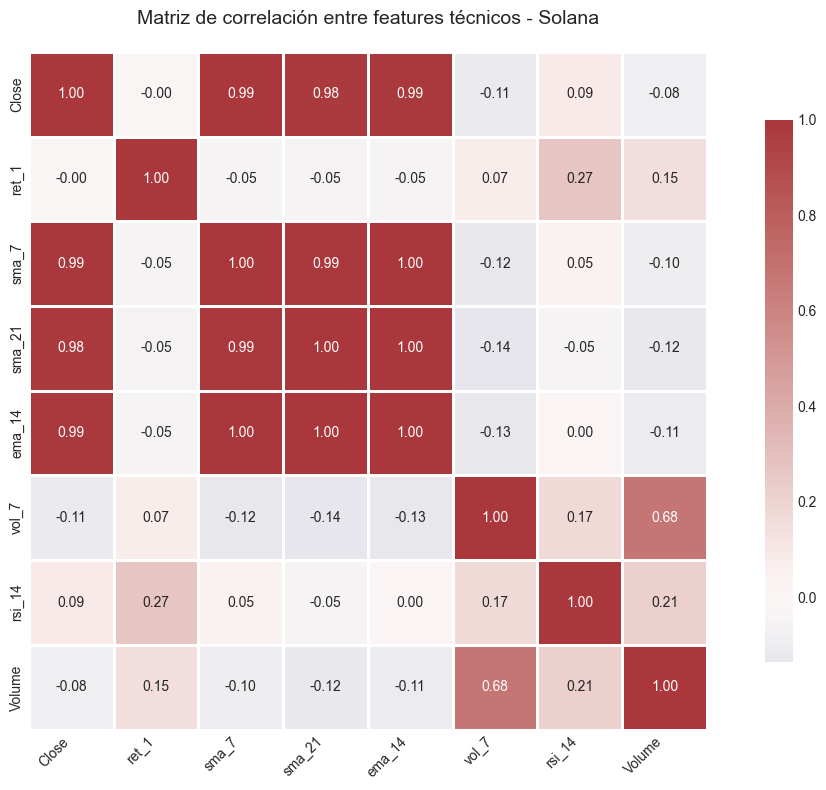

CORRELACIONES CLAVE (absolutas > 0.7)
sma_7 - ema_14: 0.9980 (POSITIVA)
sma_21 - ema_14: 0.9972 (POSITIVA)
Close - sma_7: 0.9946 (POSITIVA)
Close - ema_14: 0.9911 (POSITIVA)
sma_7 - sma_21: 0.9908 (POSITIVA)
Close - sma_21: 0.9809 (POSITIVA)


In [81]:
# Crear features adicionales para análisis de correlación
df['ret_1'] = df['Close'].pct_change()
df['sma_7'] = df['Close'].rolling(7).mean()
df['sma_21'] = df['Close'].rolling(21).mean()
df['ema_14'] = df['Close'].ewm(span=14, adjust=False).mean()
df['vol_7'] = df['Volume'].rolling(7).std()

# RSI simple (14 períodos)
delta = df['Close'].diff()
gain = delta.clip(lower=0).rolling(14).mean()
loss = -delta.clip(upper=0).rolling(14).mean()
rs = gain / loss
df['rsi_14'] = 100 - (100 / (1 + rs))

# Seleccionar columnas para correlación
cols_corr = ['Close', 'ret_1', 'sma_7', 'sma_21', 'ema_14', 'vol_7', 'rsi_14', 'Volume']
corr_matrix = df[cols_corr].dropna().corr()

# Heatmap de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='vlag', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de correlación entre features técnicos - Solana', fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Análisis de correlaciones más fuertes
print("="*60)
print("CORRELACIONES CLAVE (absolutas > 0.7)")
print("="*60)

# Filtrar correlaciones fuertes (excluyendo auto-correlación)
strong_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        val = corr_matrix.iloc[i, j]
        if abs(val) > 0.7:
            strong_corr.append((corr_matrix.columns[i], corr_matrix.columns[j], val))

# Mostrar correlaciones fuertes
for feat1, feat2, corr_val in sorted(strong_corr, key=lambda x: abs(x[2]), reverse=True):
    direction = "POSITIVA" if corr_val > 0 else "NEGATIVA"
    print(f"{feat1} - {feat2}: {corr_val:.4f} ({direction})")

## 5. GRÁFICA 1: Precio histórico + medias móviles

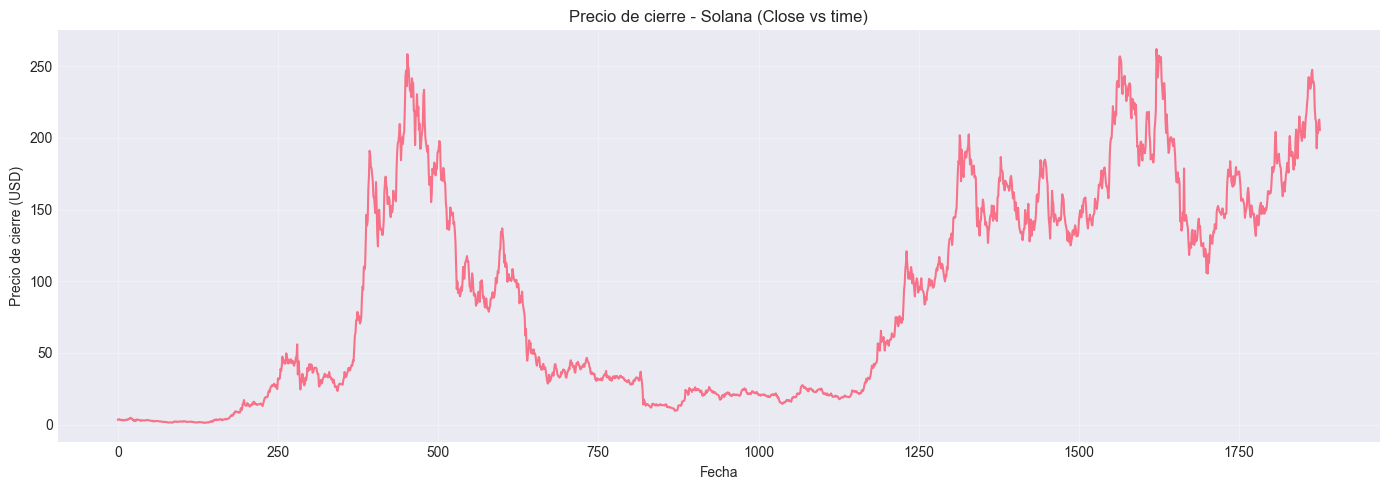

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(
    "../data/sol_1d_data_2020_to_2025.csv",
    parse_dates=["Open time"]
)

df = df.sort_values("Open time")
# df = df.set_index("Open time")
# Plot
plt.figure(figsize=(14,5))
sns.lineplot(x=df.index, y=df["Close"])
plt.title("Precio de cierre - Solana (Close vs time)")
plt.xlabel("Fecha")
plt.ylabel("Precio de cierre (USD)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("../output/close_time.png", dpi=200)
plt.show()

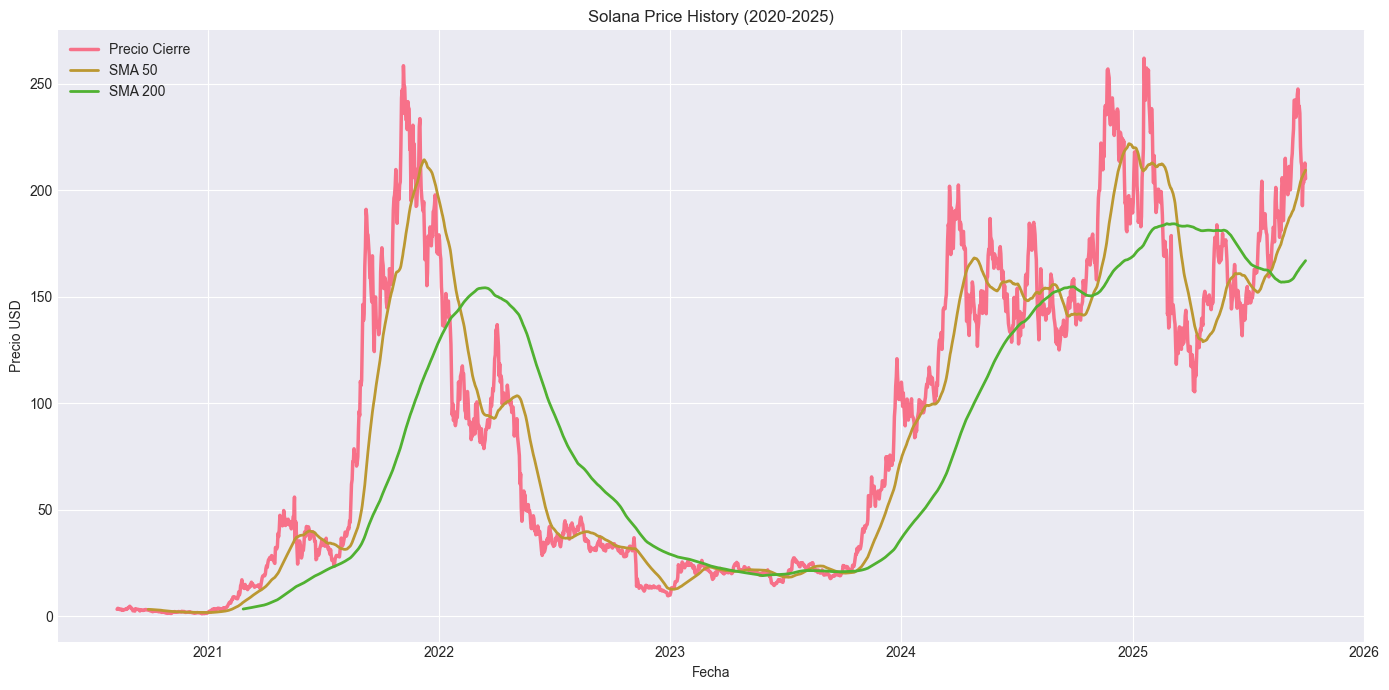

In [75]:
df['SMA50'] = df['Close'].rolling(50).mean()
df['SMA200'] = df['Close'].rolling(200).mean()

fig, ax = plt.subplots(figsize=(14,7))

ax.plot(df['Open time'], df['Close'], label='Precio Cierre', linewidth=2.5)
ax.plot(df['Open time'], df['SMA50'], label='SMA 50', linewidth=2)
ax.plot(df['Open time'], df['SMA200'], label='SMA 200', linewidth=2)

ax.set_title('Solana Price History (2020-2025)')
ax.set_xlabel('Fecha')
ax.set_ylabel('Precio USD')
ax.legend()

plt.tight_layout()
plt.show()


## 6. GRÁFICA 2: Distribución de retornos


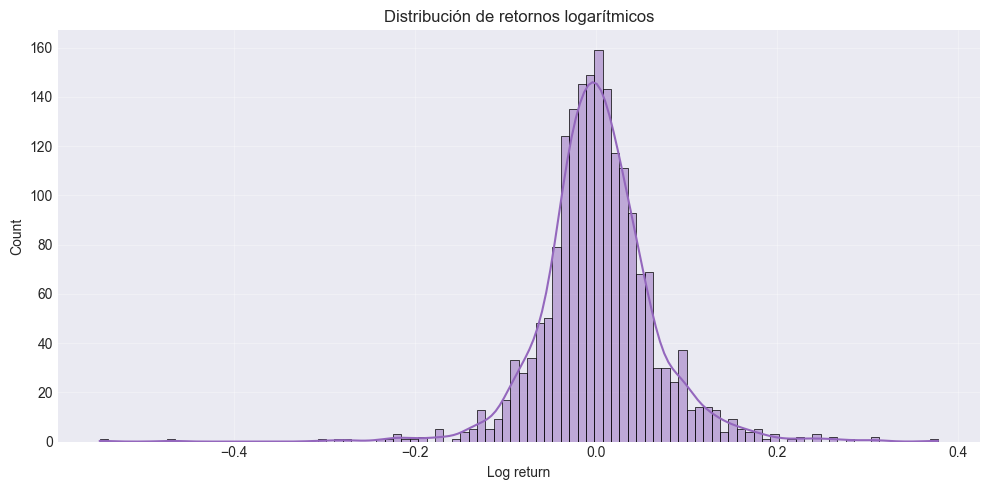

<Figure size 600x600 with 0 Axes>

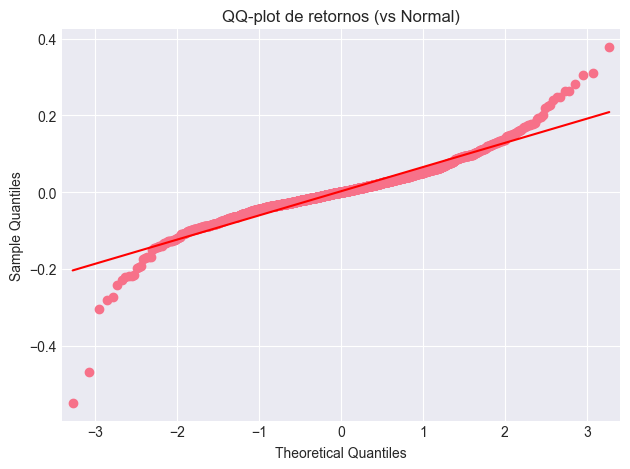

In [76]:
# ! pip install statsmodels
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Calcular retornos logarítmicos
df["log_ret"] = np.log(df["Close"] / df["Close"].shift(1))
rets = df["log_ret"].dropna()

# Histograma con KDE
plt.figure(figsize=(10,5))
sns.histplot(rets, bins=100, kde=True, color="tab:purple")
plt.title("Distribución de retornos logarítmicos")
plt.xlabel("Log return")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("../output/returns_hist.png", dpi=200)
plt.show()

# QQ-plot (vs normal)
plt.figure(figsize=(6,6))
sm.qqplot(rets, line="s")
plt.title("QQ-plot de retornos (vs Normal)")
plt.tight_layout()
plt.savefig("../output/returns_qq.png", dpi=200)
plt.show()


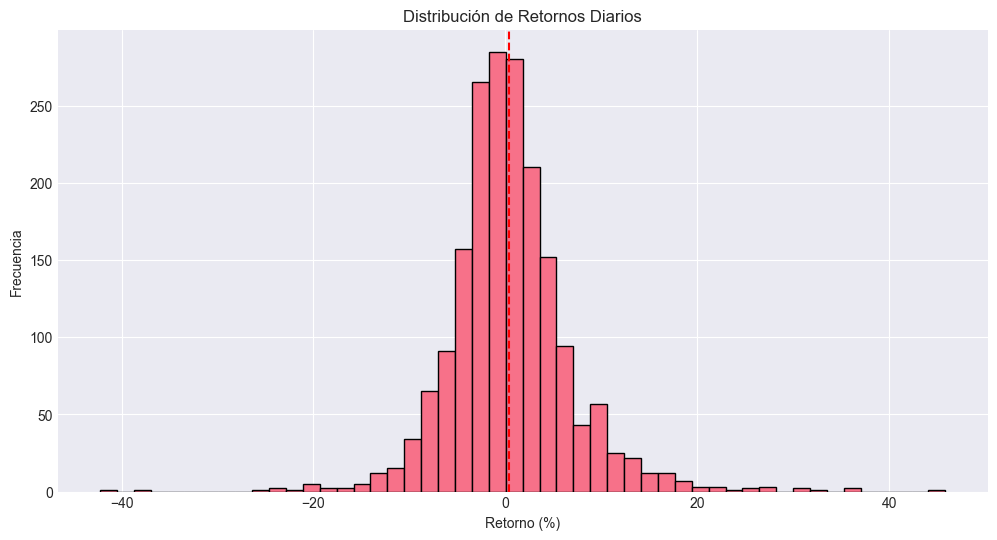

In [77]:
# Calcular retornos diarios en porcentaje
df['Returns'] = df['Close'].pct_change() * 100

# Graficar histograma
fig, ax = plt.subplots(figsize=(12,6))
ax.hist(df['Returns'].dropna(), bins=50, edgecolor='black')
ax.axvline(df['Returns'].mean(), color='red', linestyle='--')

ax.set_title('Distribución de Retornos Diarios')
ax.set_xlabel('Retorno (%)')
ax.set_ylabel('Frecuencia')

plt.show()



## 7. GRÁFICA 3: Volumen vs precio


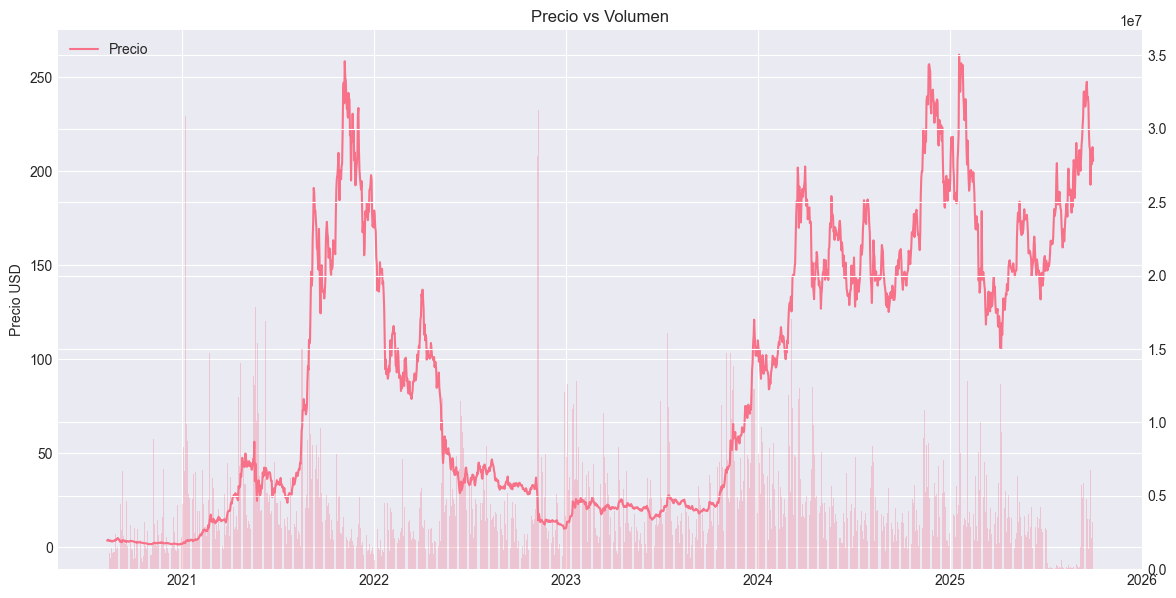

Correlación Precio-Volumen: -0.07321323314348316


In [78]:
fig, ax1 = plt.subplots(figsize=(14,7))

ax1.plot(df['Open time'], df['Close'], label='Precio')
ax1.set_ylabel('Precio USD')

ax2 = ax1.twinx()
ax2.bar(df['Open time'], df['Volume'], alpha=0.3, label='Volumen')

ax1.set_title('Precio vs Volumen')
ax1.legend(loc='upper left')

plt.show()

print("Correlación Precio-Volumen:", df['Close'].corr(df['Volume']))


## 10. Feature Engineering para modelado


In [79]:
features_df = df[['Open time','Open','High','Low','Close','Volume','Number of trades']].copy()

features_df['Returns'] = features_df['Close'].pct_change()
features_df['SMA20'] = features_df['Close'].rolling(20).mean()
features_df['Volatility_20'] = features_df['Returns'].rolling(20).std()

features_df['Target_Price'] = features_df['Close'].shift(-1)
features_df['Target_Direction'] = (features_df['Target_Price'] > features_df['Close']).astype(int)

features_df_clean = features_df.dropna()

print(features_df_clean.head())
print(features_df_clean.shape)


    Open time    Open    High     Low   Close      Volume  Number of trades  \
20 2020-08-31  4.4127  4.8865  4.1000  4.7435  1497129.12             23396   
21 2020-09-01  4.7432  4.9475  4.3000  4.3397  1267574.76             20174   
22 2020-09-02  4.3213  4.3506  3.6600  4.1700  2002058.36             25545   
23 2020-09-03  4.1700  4.4590  3.4772  3.5051  3275612.26             37166   
24 2020-09-04  3.5062  3.8346  3.1739  3.5301  2052197.24             23918   

     Returns     SMA20  Volatility_20  Target_Price  Target_Direction  
20  0.070550  3.496800       0.086276        4.3397                 0  
21 -0.085127  3.525995       0.084828        4.1700                 0  
22 -0.039104  3.547995       0.085482        3.5051                 0  
23 -0.159448  3.552755       0.091178        3.5301                 1  
24  0.007132  3.570610       0.089462        2.6052                 0  
(1856, 12)


## 11. Exportar 'features'


In [80]:
features_df_clean.to_csv('../data/features_prepared.csv', index=False)
print("Features exportadas correctamente")


Features exportadas correctamente


## 12. Conclusiones EDA

Este análisis exploratorio ha identificado los siguientes patrones clave a partir de las métricas calculadas previamente:

### Hallazgos Principales:
1. **Volatilidad extremadamente alta**: la volatilidad anualizada alcanza el **100.72%**, lo que confirma que Solana es un activo de muy alto riesgo.
2. **Tendencia alcista de largo plazo con ciclos marcados**: el precio pasa de **$3.30 a $205.39**, con un crecimiento total del **6126.77%**, intercalado con fuertes correcciones.
3. **No estacionariedad evidente**: la presencia de grandes cambios de nivel y volatilidad variable indica drift temporal en la serie.
4. **Correlación Precio–Volumen débil y negativa**: coeficiente de **-0.073**, lo que sugiere que el volumen no explica directamente los movimientos de precio.
5. **Distribución de retornos no normal**: presencia de colas pesadas y eventos extremos (retornos diarios entre **-42.25% y +45.87%**).
6. **Drawdown máximo severo**: caída máxima cercana al **-99.5%**, reflejando periodos de pérdidas extremas.

### Implicaciones para Modelado:
- **Alta volatilidad** dificulta predicciones puntuales de precio.
- **No estacionariedad** obliga a aplicar transformaciones (retornos, diferenciación).
- **Escalado obligatorio** de variables debido al amplio rango de precios.
- **Modelos secuenciales** (LSTM, ventanas temporales) son más adecuados que enfoques puramente estáticos.
- **Sharpe ratio bajo (≈ 0.07)** indica una relación riesgo-retorno débil, relevante para estrategias de trading.
- **El volumen no debe asumirse como predictor fuerte** sin ingeniería adicional de features.

### Próximos Pasos:
El notebook `02_Model_Training.ipynb` utilizará los features generados para entrenar y evaluar:
- Random Forest como baseline no lineal
- LSTM para capturar dependencias temporales
- Modelos ensemble para mejorar la robustez predictiva
